# Question 2  

An experiment was performed to improve the yield of a chemical process. Four factors were selected, an two replicates of a completely randomized experiment were run. The results are shown in the following table:

In [1]:
A <- rep(c(-1, 1), 16)
B <- rep(c(-1, -1, 1, 1), 8)
C <- rep(c(-1, -1, -1, -1, 1, 1, 1, 1), 4)
D <- rep(c(-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1), 2)
y <- c(
    90, 74, 81, 83, 77, 81, 88, 73,
    98, 72, 87, 85, 99, 79, 87, 80,
    93, 78, 85, 80, 78, 80, 82, 70,
    95, 76, 83, 86, 90, 75, 84, 80
)
data <- data.frame(A,B,C,D, y)
t(data)

A,-1,1,-1,1,-1,1,-1,1,-1,1,...,-1,1,-1,1,-1,1,-1,1,-1,1
B,-1,-1,1,1,-1,-1,1,1,-1,-1,...,1,1,-1,-1,1,1,-1,-1,1,1
C,-1,-1,-1,-1,1,1,1,1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,1,1
D,-1,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,-1,1,1,1,1,1,1,1,1
y,90,74,81,83,77,81,88,73,98,72,...,82,70,95,76,83,86,90,75,84,80


**a)** Estimate the factor effects.

The factors effects can be caluclated as:

In [2]:
model <- lm(y ~ A*B*C*D, data = data)
Effects <- as.matrix(2 * model$coefficients)
t(Effects)

(Intercept),A,B,C,D,A:B,A:C,B:C,A:D,B:D,C:D,A:B:C,A:B:D,A:C:D,B:C:D,A:B:C:D
165.5625,-9.0625,-1.3125,-2.6875,3.9375,4.0625,0.6875,-0.5625,-2.1875,-0.1875,1.6875,-5.1875,4.6875,-0.9375,-0.9375,2.4375


**b)** Prepare an analysis of variance table, and determine which factors are important in explaining yield.

In [3]:
model.aov <- aov(y ~ A*B*C*D, data = data)
summary(model.aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1  657.0   657.0  85.816 7.87e-08 ***
B            1   13.8    13.8   1.800 0.198445    
C            1   57.8    57.8   7.547 0.014317 *  
D            1  124.0   124.0  16.200 0.000979 ***
A:B          1  132.0   132.0  17.245 0.000749 ***
A:C          1    3.8     3.8   0.494 0.492302    
B:C          1    2.5     2.5   0.331 0.573296    
A:D          1   38.3    38.3   5.000 0.039945 *  
B:D          1    0.3     0.3   0.037 0.850417    
C:D          1   22.8    22.8   2.976 0.103793    
A:B:C        1  215.3   215.3  28.118 7.15e-05 ***
A:B:D        1  175.8   175.8  22.959 0.000200 ***
A:C:D        1    7.0     7.0   0.918 0.352162    
B:C:D        1    7.0     7.0   0.918 0.352162    
A:B:C:D      1   47.5    47.5   6.208 0.024077 *  
Residuals   16  122.5     7.7                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

$A,C,D$ are all important in explaining yield. Although $B$ isn't significant it's interactions with  
$A$, $AC$, $AD$, $ACD$ are significant, so we should keep it in the model.

**c)** Write down a regression model for predicting yield, assuming that all four factors were varied over the range from $-1$ to $+1$ (in coded units).

In [4]:
summary(model)


Call:
lm(formula = y ~ A * B * C * D, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
  -4.5   -1.5    0.0    1.5    4.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 82.78125    0.48914 169.238  < 2e-16 ***
A           -4.53125    0.48914  -9.264 7.87e-08 ***
B           -0.65625    0.48914  -1.342 0.198445    
C           -1.34375    0.48914  -2.747 0.014317 *  
D            1.96875    0.48914   4.025 0.000979 ***
A:B          2.03125    0.48914   4.153 0.000749 ***
A:C          0.34375    0.48914   0.703 0.492302    
B:C         -0.28125    0.48914  -0.575 0.573296    
A:D         -1.09375    0.48914  -2.236 0.039945 *  
B:D         -0.09375    0.48914  -0.192 0.850417    
C:D          0.84375    0.48914   1.725 0.103793    
A:B:C       -2.59375    0.48914  -5.303 7.15e-05 ***
A:B:D        2.34375    0.48914   4.792 0.000200 ***
A:C:D       -0.46875    0.48914  -0.958 0.352162    
B:C:D       -0.46875    0.48914  -0.958 0.352162    
A

The model is...  

$$
\begin{align}
Y = 82.78A - 0.66B - 1.34C + 1.97D \\
+ 2.03AB + 0.34AC -0.28 BC   \\
- 1.09AD - 0.09BD +  0.84CD  \\
-2.59ABC + 2.34ABD -0.47ACD \\
-0.47BCD + 1.22ABCD
\end{align}
$$


**d)** Does the residual analysis appear satisfactory?


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.96135, p-value = 0.2989


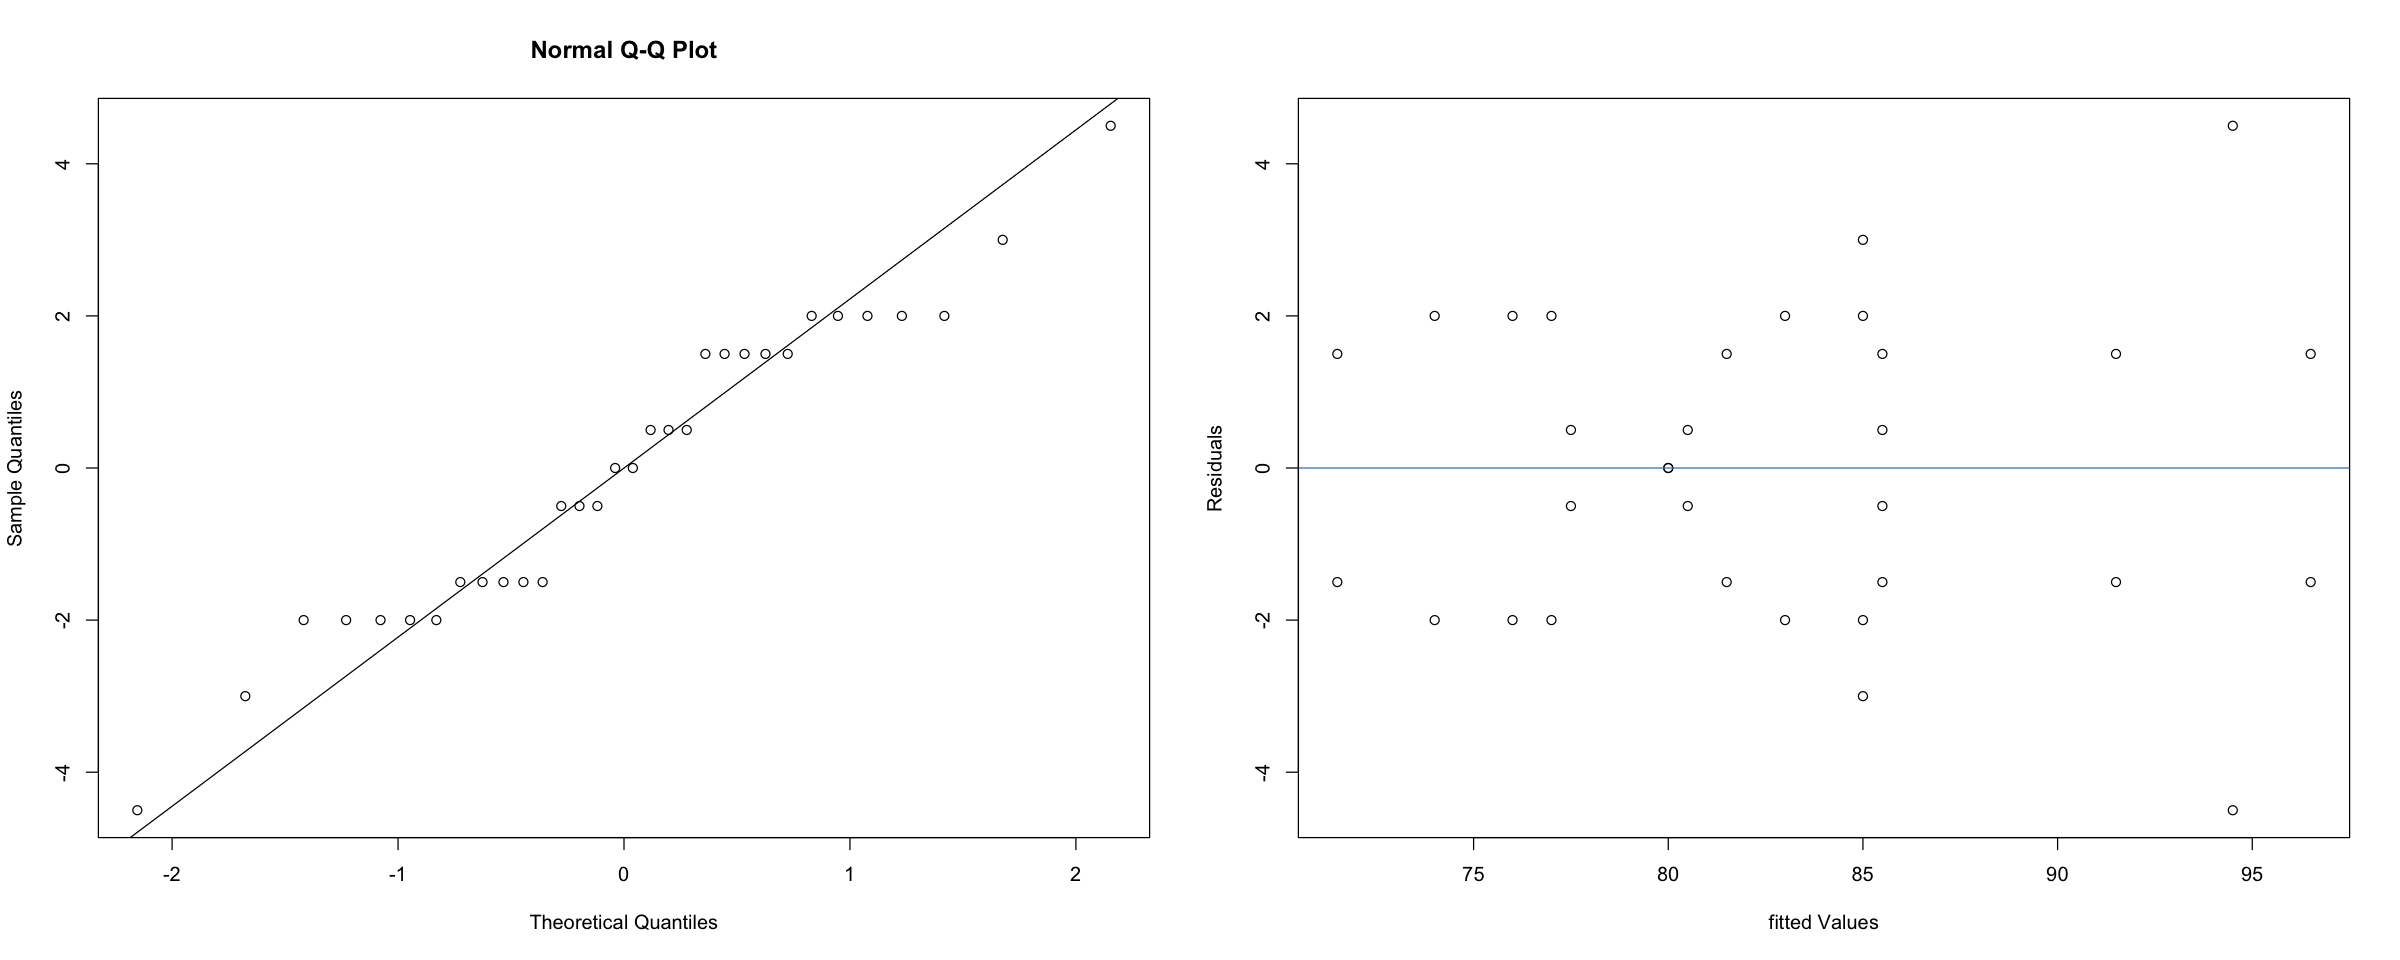

In [5]:
par(mfrow = c(1,2))
options(repr.plot.width = 20, repr.plot.height = 8)
# QQplot
qqnorm(residuals(model))
qqline(residuals(model))
# Fitted Values versus Residuals
plot(fitted(model), residuals(model), xlab = "fitted Values", ylab = "Residuals")
abline(h=0, col= "steelblue")  

# Shapiro-Wilk
shapiro.test(residuals(model))

There is nothing in the graphs that suggests the residual analysis would be unsatisfactory.